In [1]:
import copy
import random
from random import choice

from   scipy.stats import norm
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from   matplotlib.colors import LinearSegmentedColormap
import numpy as np
import scipy
import scipy.sparse
import sklearn
from   sklearn.decomposition import PCA
import statistics
from   sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.cluster import DBSCAN

import scanpy as sc
import squidpy as sq

C:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\dask\dataframe\__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
C:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\numba\core\decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
C:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\anndata\utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [56]:
W = 'white'
B = 'black'
mpl.rcParams['text.color']      = W
mpl.rcParams['axes.labelcolor'] = W
mpl.rcParams['axes.edgecolor']  = W
mpl.rcParams['axes.facecolor']  = B
mpl.rcParams['figure.facecolor'] = B
mpl.rcParams['xtick.color']     = W
mpl.rcParams['ytick.color']     = W
mpl.rcParams['font.family']     = "monospace"

colors     = [(0.12, 0, 0), (1, 1, 1)]
cmap_name  = "black_white"
BWCMAP     = LinearSegmentedColormap.from_list(cmap_name, colors)

SHAPE     = "circle"
CMAP      = "bone"
FIGSIZE   = (5, 5)
IMG_ALPHA = 0
COLORBAR  = False

def plot_spatial_scatter(data, gene_data, ax, cmap=CMAP, figsize=FIGSIZE):
    data.obs["show_gene"] = gene_data
    sq.pl.spatial_scatter(
            data, 
            shape     = SHAPE,
            size      = 5, 
            alpha     = 0.2,
            color     = "show_gene", 
            figsize   = figsize,
            cmap      = cmap,
            colorbar  = COLORBAR,
            img_alpha = IMG_ALPHA,
            ax        = ax)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title("")

    ax.spines['bottom'].set_color(B)
    ax.spines['top'].set_color(B)
    ax.spines['right'].set_color(B)
    ax.spines['left'].set_color(B)

def load_data():
    h5ad_file       = '1.DLPFC/151673/scRNA.h5ad'
    expression_file = '1.DLPFC/151673/filtered_feature_bc_matrix.h5'
    oprefix         = 'DLPFC-151673'
    
    adata_gene_expression = sc.read_visium('1.DLPFC/151673', count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata_gene_expression.var_names_make_unique()

    # init_filter_support_data(adata_gene_expression)
    
    return adata_gene_expression

In [3]:
scdata      = load_data()
transf_data = np.load("transformed_data.npy")

C:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Workstation\magistrale\algo_ai\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
from sklearn.cluster import KMeans

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(transf_data)
labels = kmeans.labels_

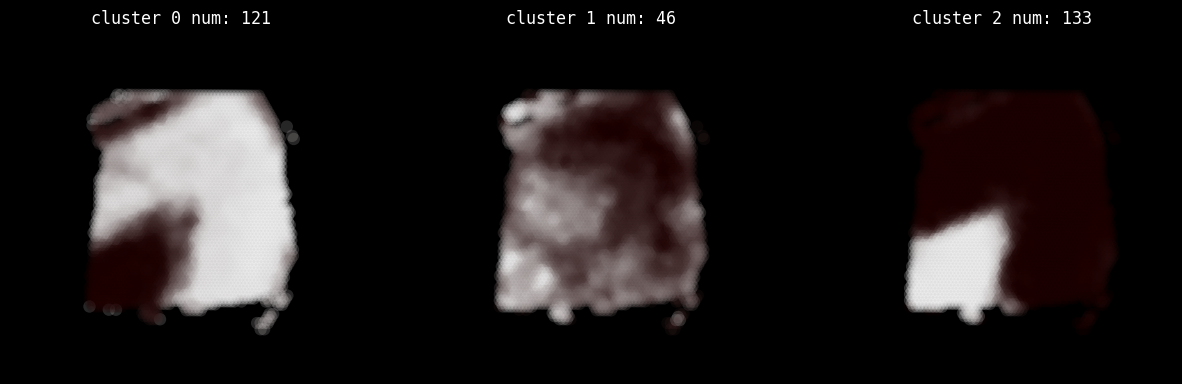

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=n_clusters, facecolor=B, figsize=(n_clusters*5, 5))

for i in range(n_clusters):
    l = transf_data[labels ==  i]
    plot_spatial_scatter(scdata, l.mean(axis=0), axs[i], cmap=BWCMAP)
    axs[i].set_title(f"cluster {i} num: {len(l)}")
plt.show()

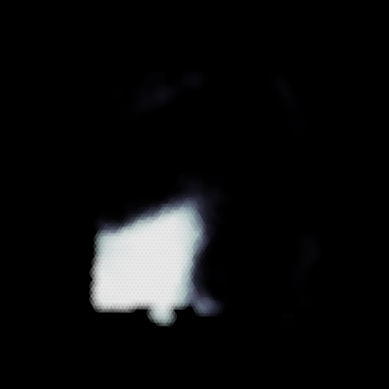

In [61]:
l = transf_data[labels ==  2]
plot_spatial_scatter(scdata, l.mean(axis=0), plt.gca())
plt.savefig("cl3.jpg")
plt.show()

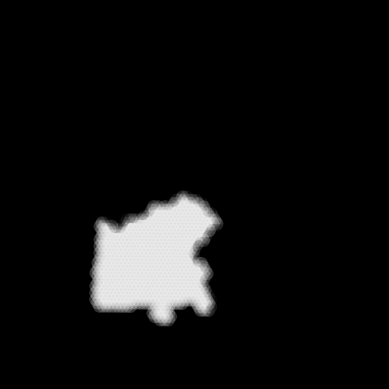

In [95]:
smallest = np.load("transformed_data_idxs.npy")
array_data = scdata.X.toarray().T

plot_spatial_scatter(scdata, transf_data[labels ==  2][20], plt.gca())
# plt.savefig("cl3_1.jpg")

In [42]:
from sklearn.cluster import Birch

n_clusters = 3

kmeans = Birch(n_clusters=n_clusters).fit(transf_data)
labels = kmeans.labels_

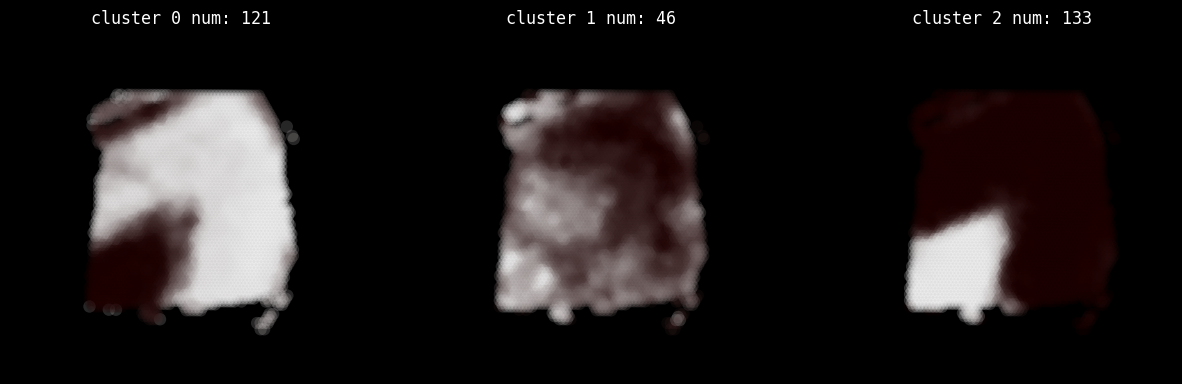

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=n_clusters, facecolor=B, figsize=(n_clusters*5, 5))

for i in range(n_clusters):
    l = transf_data[labels ==  i]
    plot_spatial_scatter(scdata, l.mean(axis=0), axs[i], cmap=BWCMAP)
    axs[i].set_title(f"cluster {i} num: {len(l)}")
plt.show()

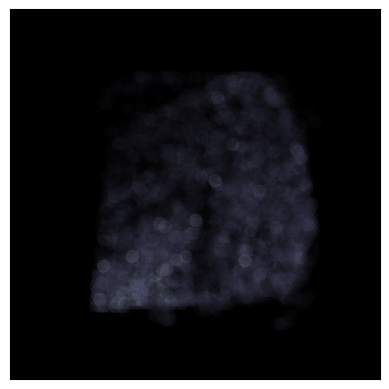

In [44]:
smallest = np.load("transformed_data_idxs.npy")
array_data = scdata.X.toarray().T

plot_spatial_scatter(scdata, array_data[choice(smallest[labels ==  2])], plt.gca())

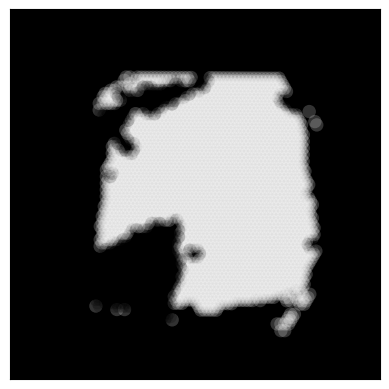

In [47]:
smallest = np.load("transformed_data_idxs.npy")
plot_spatial_scatter(scdata, choice(transf_data[labels ==  0]), plt.gca())